Linear Regression Results:
Mean Squared Error (MSE): 22.77713
Mean Absolute Error (MAE): 1.62580
R-squared Score: 0.99967

Support Vector Machine (SVR) Results:
Mean Squared Error (MSE): 1111.80604
Mean Absolute Error (MAE): 8.84429
R-squared Score: 0.98396


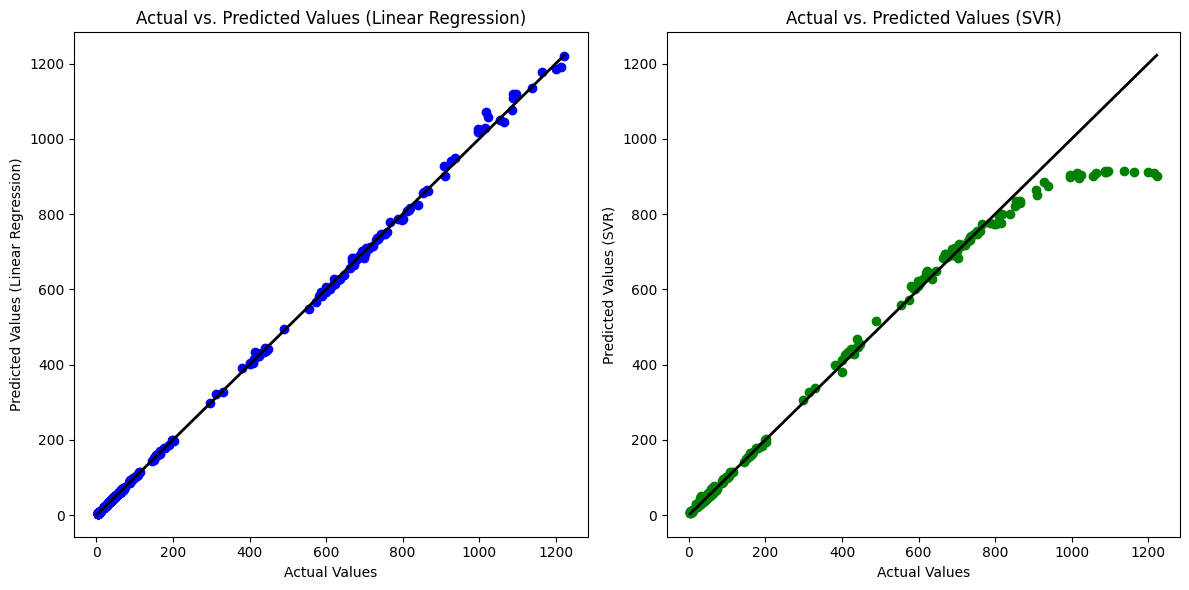

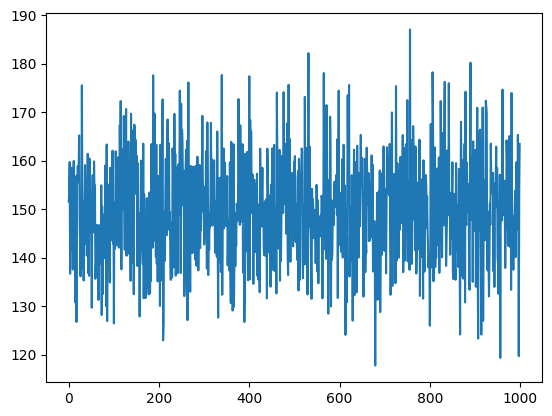

In [12]:
#YATHAMSHETTY RITHWIK
#2203A52189
#I)LINEAR REGRESSION
#II)SUPPORT VECTOR MACHINE
#III)BOOTSTRAP METHOD FOR LINEAR REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2)
linear_model = LinearRegression()
linear_model.fit(xTrain, yTrain)
y_pred_linear = linear_model.predict(xTest)
mse_linear = mean_squared_error(yTest, y_pred_linear)
mae_linear = mean_absolute_error(yTest, y_pred_linear)
r2_linear = r2_score(yTest, y_pred_linear)
svr_model = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(svr_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xTrain, yTrain)
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(xTest)
mse_svr = mean_squared_error(yTest, y_pred_svr)
mae_svr = mean_absolute_error(yTest, y_pred_svr)
r2_svr = r2_score(yTest, y_pred_svr)
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear:.5f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.5f}")
print(f"R-squared Score: {r2_linear:.5f}")
print("\nSupport Vector Machine (SVR) Results:")
print(f"Mean Squared Error (MSE): {mse_svr:.5f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.5f}")
print(f"R-squared Score: {r2_svr:.5f}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(yTest, y_pred_linear, c='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Linear Regression)")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.subplot(1, 2, 2)
plt.scatter(yTest, y_pred_svr, c='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (SVR)")
plt.title("Actual vs. Predicted Values (SVR)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.tight_layout()
plt.show()
# Implement bootstrap manually for the predictions
n_iterations = 1000
n_size = len(yTest)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =y_pred_linear[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

Manually Computed Linear Regression Results:
Mean Squared Error (MSE): 2735.00877
Mean Absolute Error (MAE): 22.75167
R-squared Score: 0.95192


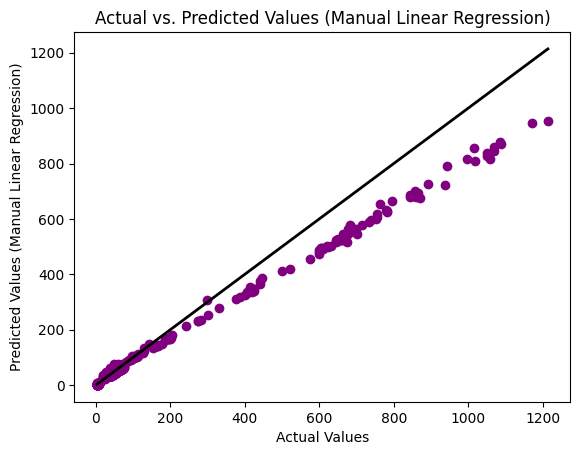

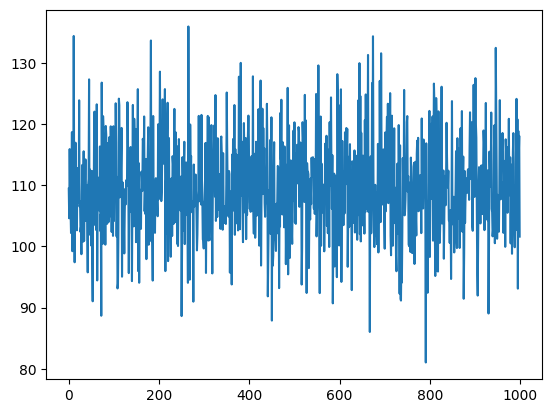

In [13]:
#YATHAMSHETTY RITHWIK
#2203A52189
#I)LINEAR REGRESSION BY MANUAL METHOD
#II)BOOTSTRAP METHOD FOR LINEAR REGRESSION(MANUAL METHOD)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2)
def manual(x, y, learning_rate, iterations):
    m, n = x.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        gradient = (1 / m) * np.dot(x.T, error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return theta, cost_history
learning_rate = 0.01
iterations = 1000
theta, _ = manual(xTrain, yTrain, learning_rate, iterations)
y_pred_manual = np.dot(xTest, theta)
mse_manual = mean_squared_error(yTest, y_pred_manual)
mae_manual = mean_absolute_error(yTest, y_pred_manual)
r2_manual = r2_score(yTest, y_pred_manual)
print("Manually Computed Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_manual:.5f}")
print(f"Mean Absolute Error (MAE): {mae_manual:.5f}")
print(f"R-squared Score: {r2_manual:.5f}")
plt.scatter(yTest, y_pred_manual, c='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Manual Linear Regression)")
plt.title("Actual vs. Predicted Values (Manual Linear Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.show()
# Implement bootstrap manually for the predictions
n_iterations = 1000
n_size = len(yTest)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = y_pred_manual[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

Ridge Regression Results:
Mean Squared Error (MSE): 31.20400
Mean Absolute Error (MAE): 2.10125
R-squared Score: 0.99947


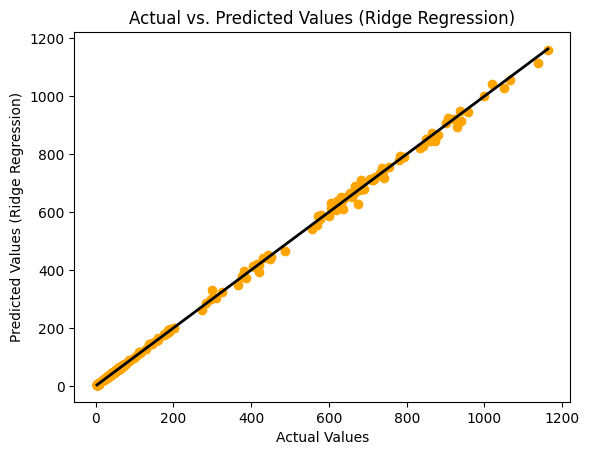

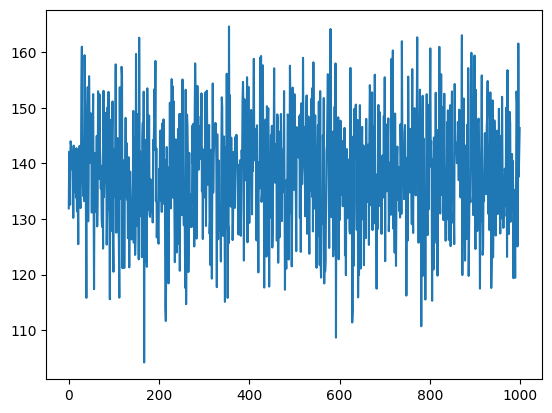

In [14]:
#YATHAMSHETTY RITHWIK
#2203A52189
#I)RIDGE REGRESSION
#II)BOOTSTRAP METHOD FOR RIDGE REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
alpha = 0.5
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(xTrain, yTrain)
y_pred_ridge = ridge_model.predict(xTest)
mse_ridge = mean_squared_error(yTest, y_pred_ridge)
mae_ridge = mean_absolute_error(yTest, y_pred_ridge)
r2_ridge = r2_score(yTest, y_pred_ridge)
print("Ridge Regression Results:")
print(f"Mean Squared Error (MSE): {mse_ridge:.5f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.5f}")
print(f"R-squared Score: {r2_ridge:.5f}")
plt.scatter(yTest, y_pred_ridge, c='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Ridge Regression)")
plt.title("Actual vs. Predicted Values (Ridge Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.show()
# Implement bootstrap manually for the predictions
n_iterations = 1000
n_size = len(yTest)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = y_pred_ridge[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.069e+04, tolerance: 1.501e+04
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Results:
Mean Squared Error (MSE): 44.03637
Mean Absolute Error (MAE): 3.10089
R-squared Score: 0.99925


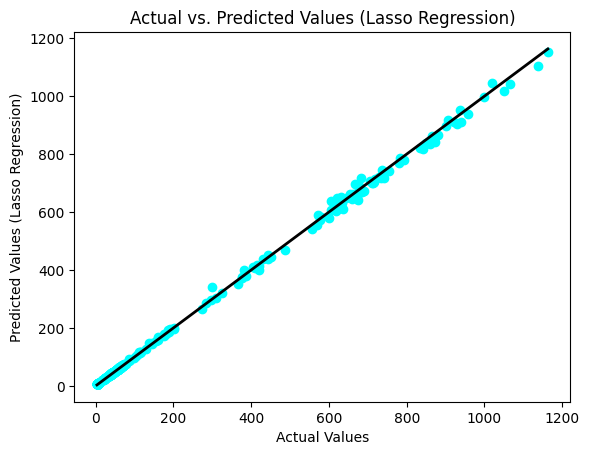

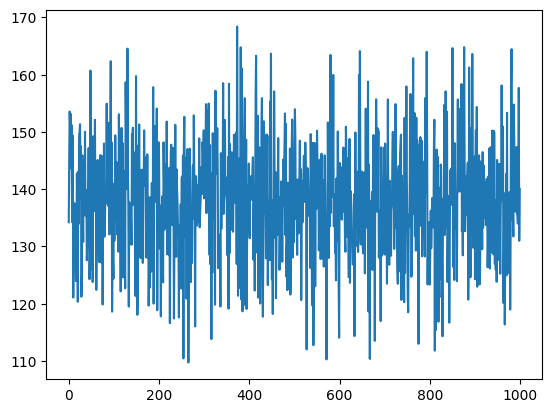

In [15]:
#YATHAMSHETTY RITHWIK
#2203A52189
#I)LASSO REGRESSION
#II)BOOTSTRAP METHOD FOR LASSO REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
alpha = 0.5
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(xTrain, yTrain)
y_pred_lasso = lasso_model.predict(xTest)
mse_lasso = mean_squared_error(yTest, y_pred_lasso)
mae_lasso = mean_absolute_error(yTest, y_pred_lasso)
r2_lasso = r2_score(yTest, y_pred_lasso)
print("Lasso Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lasso:.5f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.5f}")
print(f"R-squared Score: {r2_lasso:.5f}")
plt.scatter(yTest, y_pred_lasso, c='cyan')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Lasso Regression)")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.show()
# Implement bootstrap manually for the predictions
n_iterations = 1000
n_size = len(yTest)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = y_pred_lasso[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

K-Nearest Neighbors (KNN) Results:
Mean Squared Error (MSE): 44.91494
Mean Absolute Error (MAE): 2.81213
R-squared Score: 0.99923


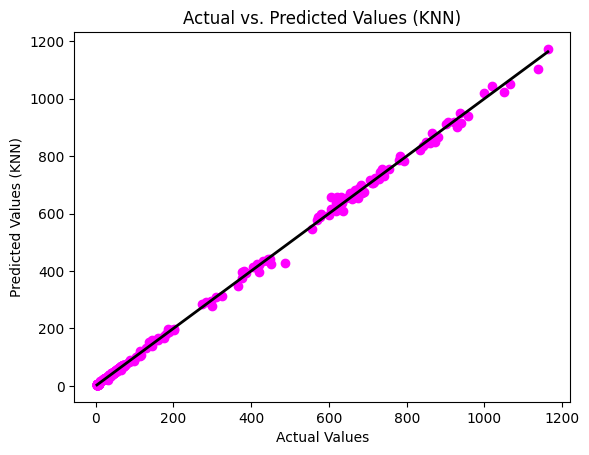

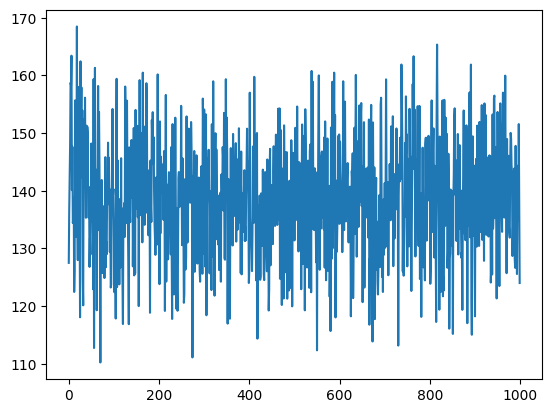

In [16]:
#YATHAMSHETTY RITHWIK
#2203A52189
#I)KNN REGRESSION
#II)BOOTSTRAP METHOD FOR KNN REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(xTrain, yTrain)
y_pred_knn = knn_model.predict(xTest)
mse_knn = mean_squared_error(yTest, y_pred_knn)
mae_knn = mean_absolute_error(yTest, y_pred_knn)
r2_knn = r2_score(yTest, y_pred_knn)
print("K-Nearest Neighbors (KNN) Results:")
print(f"Mean Squared Error (MSE): {mse_knn:.5f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.5f}")
print(f"R-squared Score: {r2_knn:.5f}")
plt.scatter(yTest, y_pred_knn, c='magenta')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (KNN)")
plt.title("Actual vs. Predicted Values (KNN)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.show()
# Implement bootstrap manually for the predictions
n_iterations = 1000
n_size = len(yTest)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = y_pred_knn[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)